In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import weekday_time_series
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

In [2]:
df = weekday_time_series(sensor_id='gesamtmessung_1T')

In [3]:
px.line(
    x=df.index, y=df.kw, 
    title='Gesamtmessung (Transformer)',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

In [17]:
df.shape

(7200, 10)

In [5]:
time_int_range = np.arange(0, df.shape[0]*1, 1)
df['t'] = time_int_range
df['t_scaled'] = (df['t'] - df['t'].min()) / (df['t'].max() - df['t'].min())

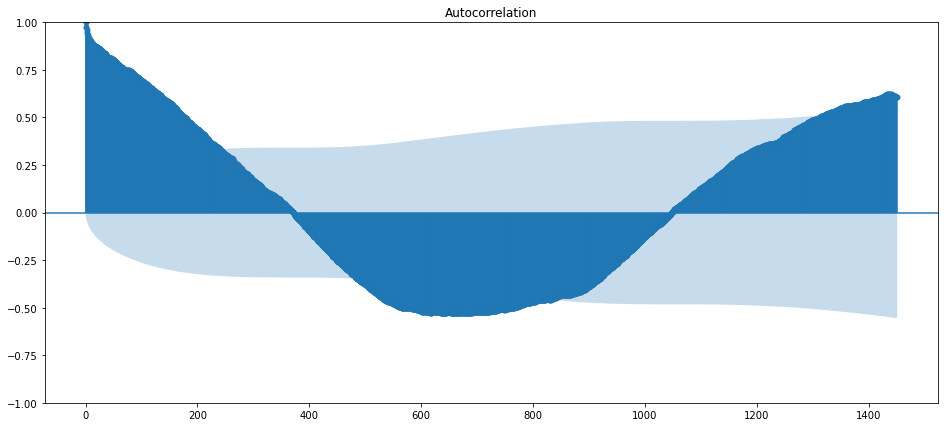

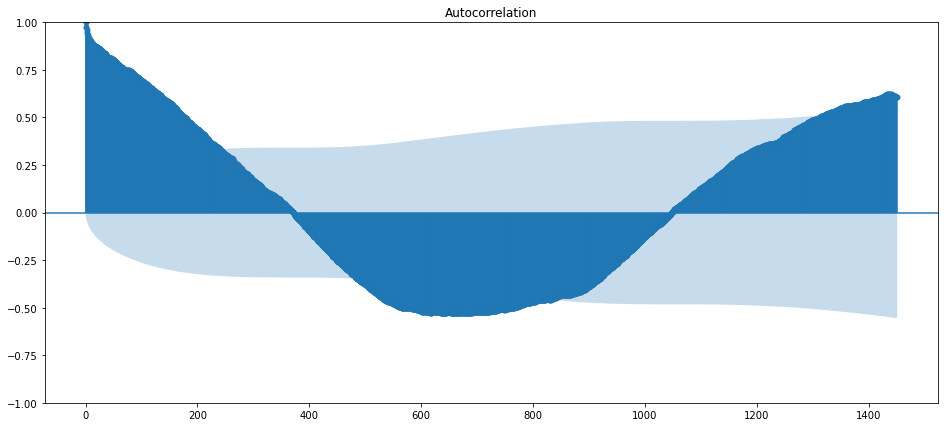

In [15]:
fig, ax = plt.subplots(figsize=(16, 7))
plot_acf(df.kw.values.squeeze(), lags=1450, ax=ax)

In [20]:
# Short term interval
df['t_scaled'].iloc[55], df['t_scaled'].iloc[70]

(0.07649513212795549, 0.09735744089012517)

In [9]:
# Short term interval
df['t_scaled'].iloc[600], df['t_scaled'].iloc[750]

(0.083344909015141, 0.10418113626892624)

In [19]:
# Long term interval
df['t_scaled'].iloc[140], df['t_scaled'].iloc[150]

(0.19471488178025034, 0.2086230876216968)

In [16]:
# Long term interval
df['t_scaled'].iloc[1400], df['t_scaled'].iloc[1450]

(0.1944714543686623, 0.2014168634532574)

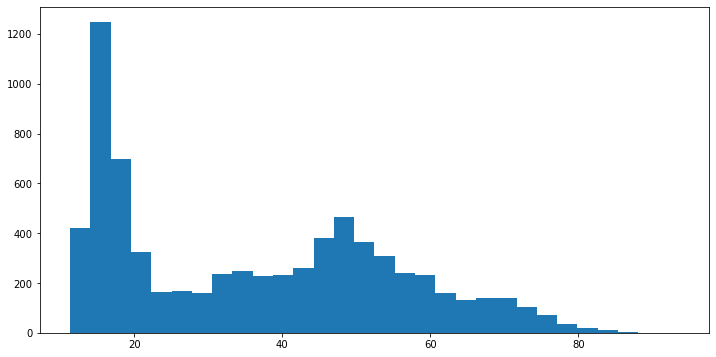

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(x=df.kw, bins=30)
plt.show()